In [5]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)
print(fruits[0,0,:]) #300개중에서 첫번째 그림 중 1행에 있는 모든 열 출력

(300, 100, 100)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


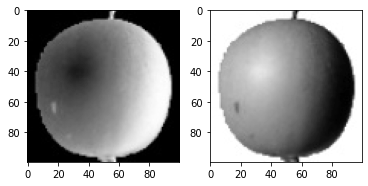

In [9]:
#subplot 을 사용하면 여러개의 그래프를 axs라는 변수에다가 배열처럼 쌓을 수 있다
#subplots(1,2)는 1행 2열로 나타낸다는 뜻
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[0],cmap='gray')
axs[1].imshow(fruits[0],cmap='gray_r')
plt.show()

In [10]:
#데이터 flatten하기
apple = fruits[:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)
print(apple.shape,pineapple.shape,banana.shape)

(100, 10000) (100, 10000) (100, 10000)


[1.01 1.01 1.01 ... 1.   1.   1.  ]
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


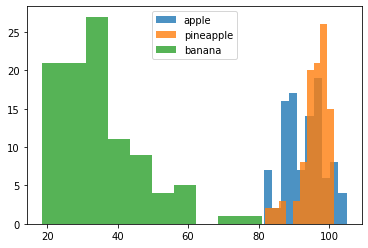

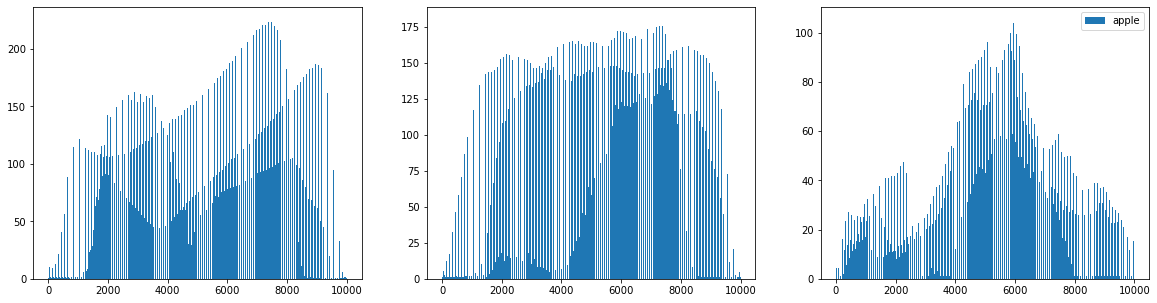

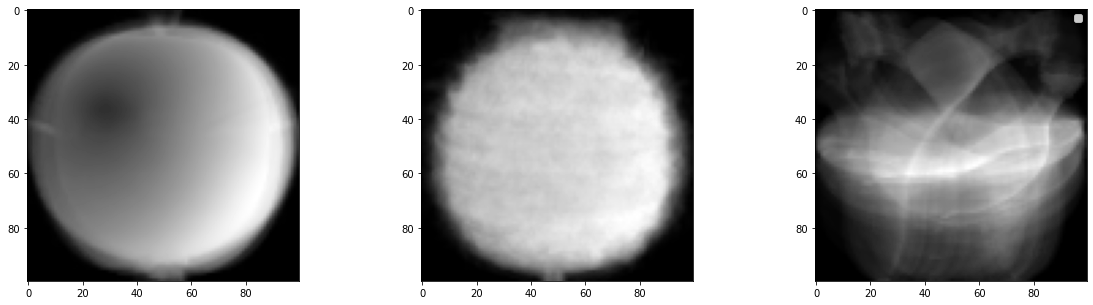

In [21]:
#이제 각 픽셀별로 분석, 첫번째로는 mean 값을 구한다
#위에 데이터 reshape을 통해서 행별로 종류가 나오고 열별로 10000개의 픽셀이 정리되어 있다
print(apple.mean(axis=0)) #행별로 mean 값 구하는 것으로 종류가 아닌 픽셀위치에서의  0부터 255 사이의 숫자의 값들의 평균을 구한것이다
print(apple.mean(axis=1)) #열별로 mean 값 구하는 것으로 한 종류의 그림에서 0부터 255 사이의 숫자의 값들의 평균을 구한것이다
#histogram 으로 열별로 계산한 mean을 통해서 300개의 과일들이 전체그림의 특징을 구해보자
plt.hist(np.mean(apple,axis=1),alpha = 0.8)
plt.hist(np.mean(pineapple,axis=1),alpha = 0.8)
plt.hist(np.mean(banana,axis=1),alpha = 0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()
#barplot으로 행별로 분석한 mean값을 통해서 10000개의 픽셀중에서 어느부분에 위치하는게 많은지 적은지 구해보자
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.legend(['apple','pineapple','banana'])
plt.show()
#이제는 mean 갑을 다시 사용해서 그려서 확인할 것이다
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray')
axs[1].imshow(pineapple_mean,cmap='gray')
axs[2].imshow(banana_mean,cmap='gray')
plt.legend(['apple','pineapple','banana'])
plt.show()


(300, 100, 100)
(300,)


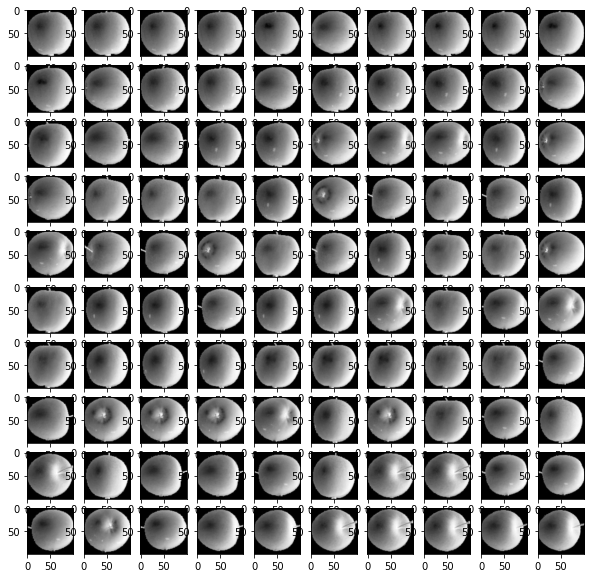

In [27]:
#apple_mean 값과 비슷한 것들을 100개 뽑아서 그려보자
abs_dif = np.abs(fruits-apple_mean)
print(abs_dif.shape)
abs_mean = np.mean(abs_dif,axis=(1,2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig,axs=plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[10*i+j]],cmap='gray')
plt.show()

In [28]:
#k-means 
fruits_2d = fruits.reshape(-1,100*100)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


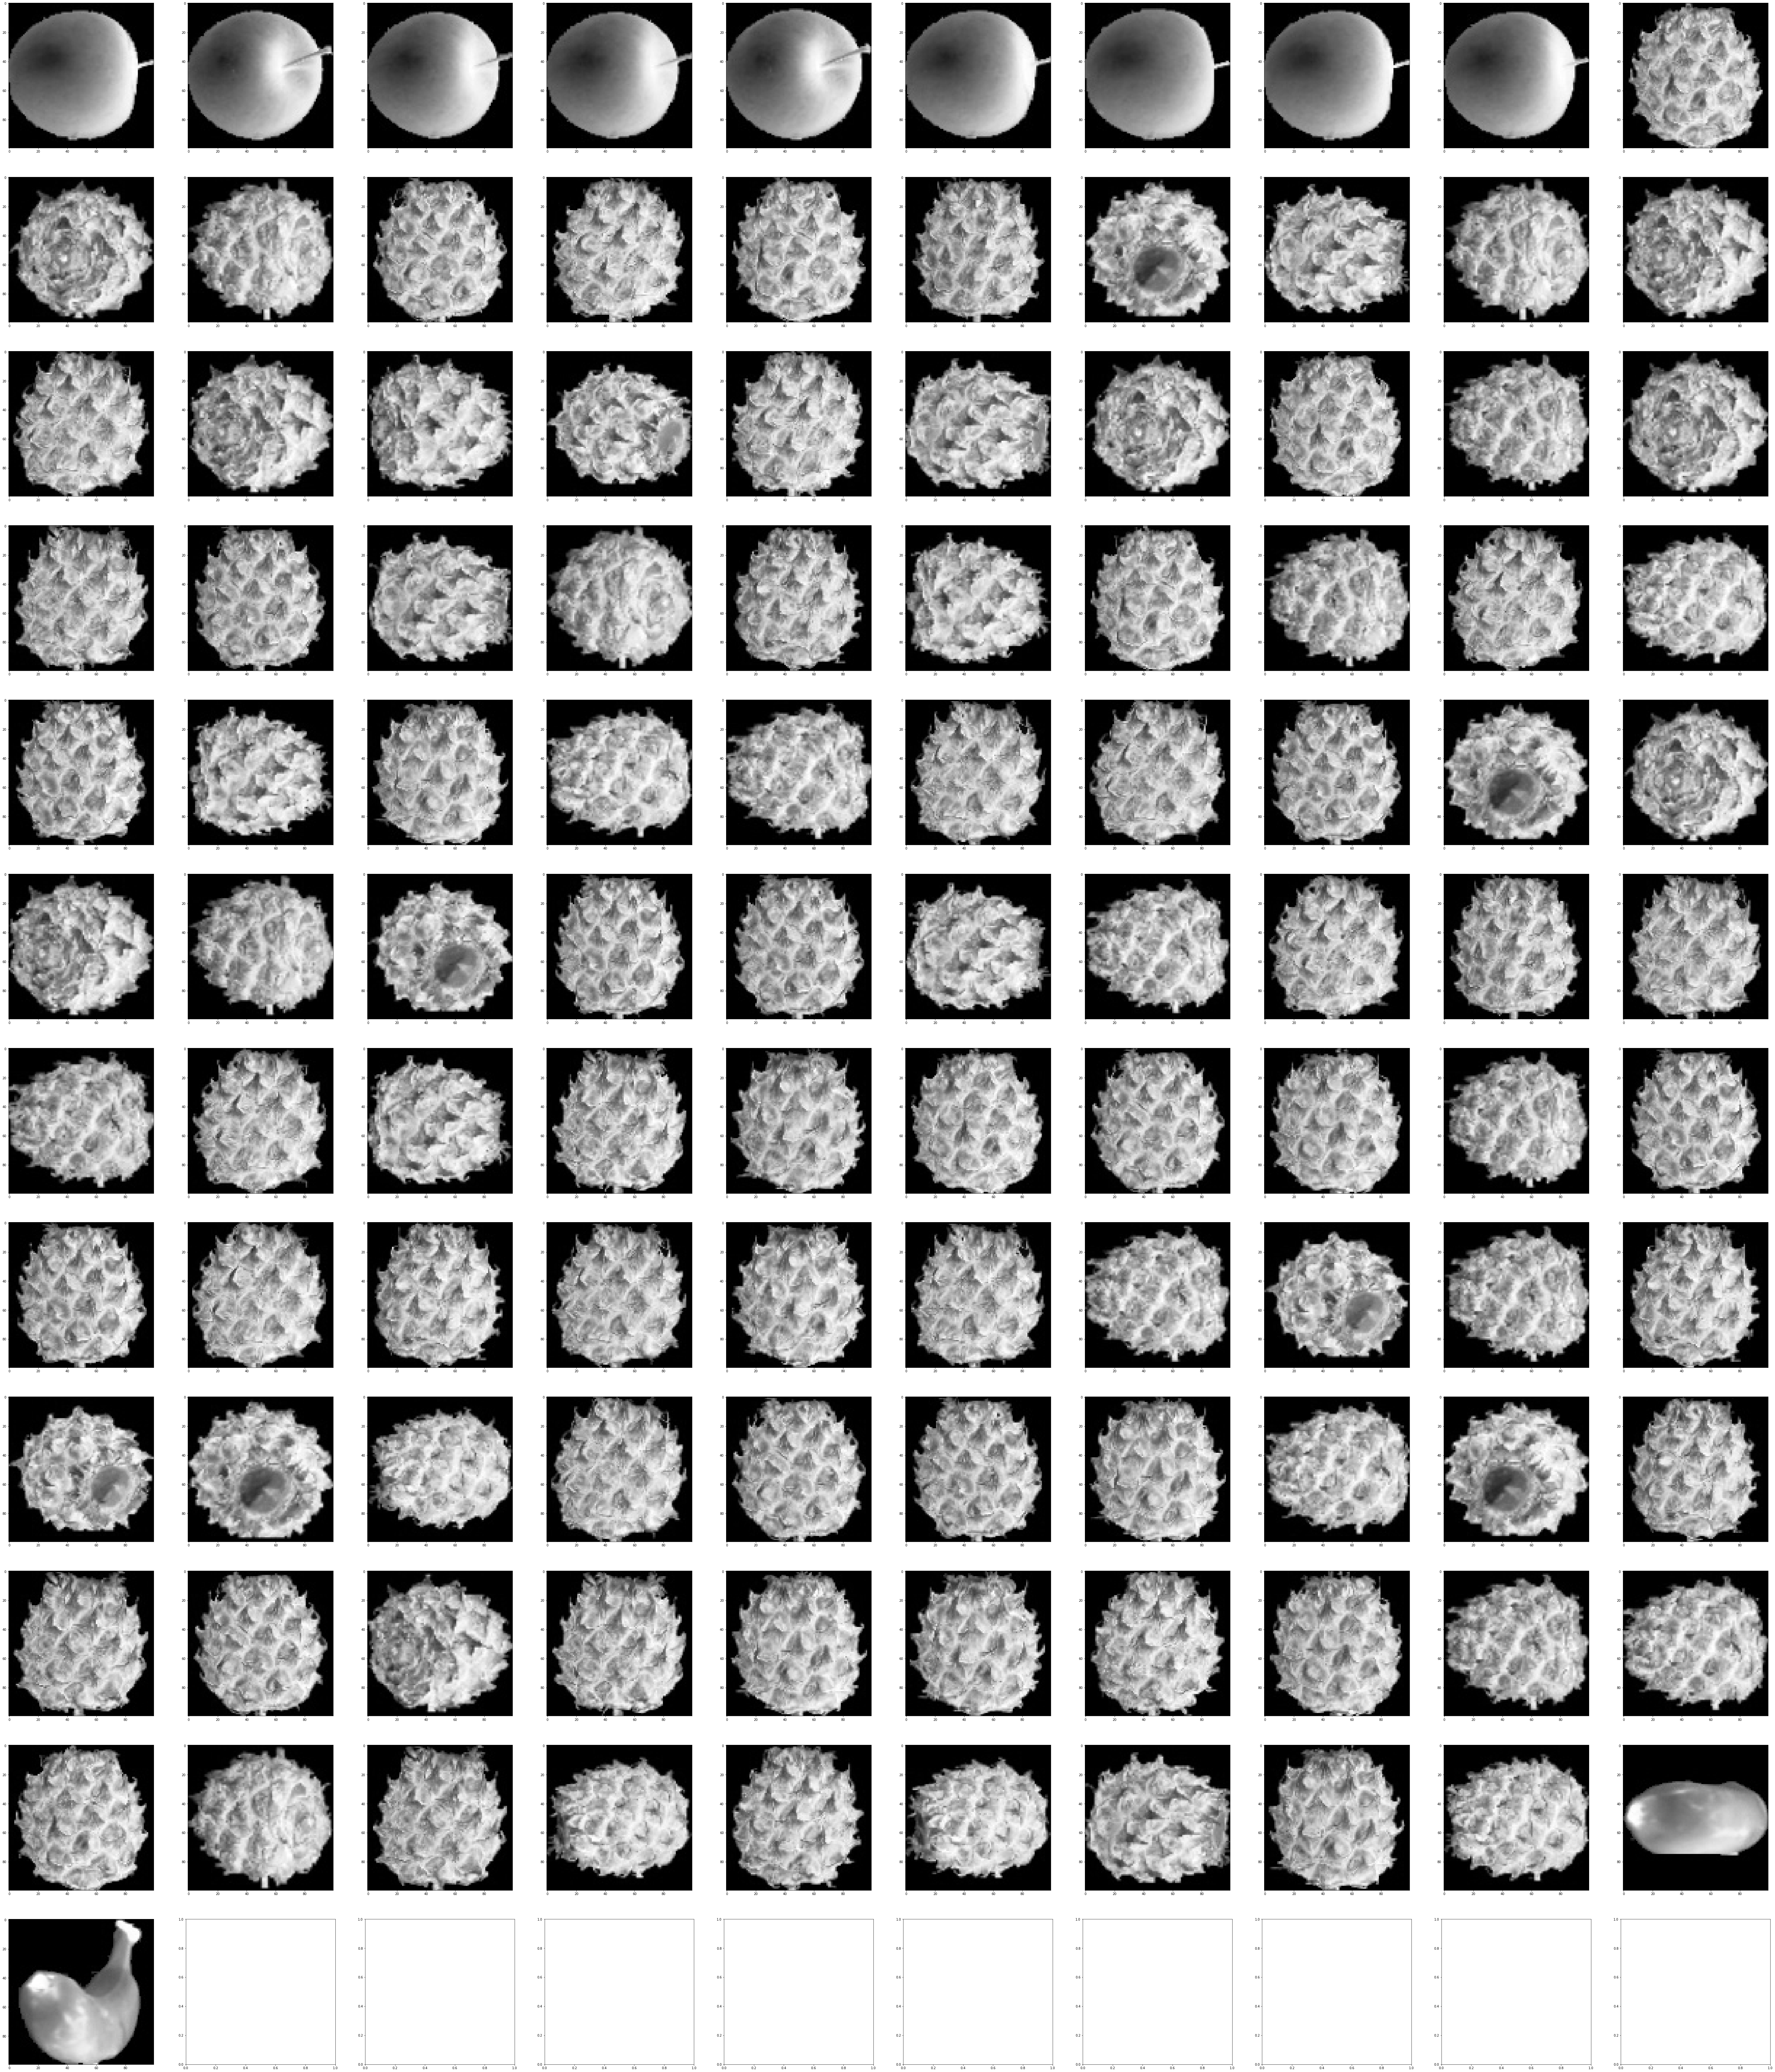

In [33]:
def draw_fruits(arr,ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig,axs=plt.subplots(rows,cols,figsize=(cols*10,rows*10),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n :
                 axs[i,j].imshow(arr[10*i+j],cmap='gray')
    plt.show()
#아래에 들어가는 fruits 는 2d가 아닌 3d이다 그래야 정확하게 픽셀당 해당되는 값들을 다 출력해줄 수 있으니까
draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [ ]:
ㅔ갸ㅜㅅ(ㅏㅡ.ㅅㄱ무)